In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")




In [8]:
 # loading the data
train_data= pd.read_csv(r"D:\Masai\Hackathon project\train.csv")
test_data = pd.read_csv(r"D:\Masai\Hackathon project\test.csv")



In [9]:
# Inspect the data
print("Train Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)



Train Data Shape: (40000, 17)
Test Data Shape: (5211, 16)


In [10]:
# Check for missing values
print("Missing Values in Train Data:\n", train_data.isnull().sum())
print("Missing Values in Test Data:\n", test_data.isnull().sum())



Missing Values in Train Data:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
Missing Values in Test Data:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64


In [21]:
train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [22]:
test.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [23]:
train.shape, test.shape

((40000, 17), (5211, 16))

In [24]:
train['y'].value_counts()

y
no     37104
yes     2896
Name: count, dtype: int64

In [25]:
train['y'].value_counts(normalize=True)

y
no     0.9276
yes    0.0724
Name: proportion, dtype: float64

<Axes: xlabel='y'>

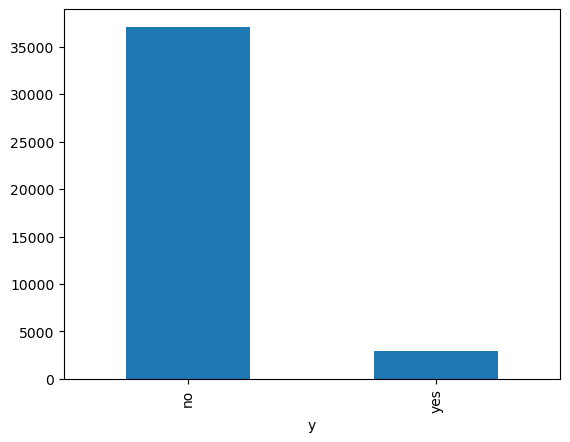

In [26]:
train['y'].value_counts().plot.bar()

<Axes: xlabel='age', ylabel='Density'>

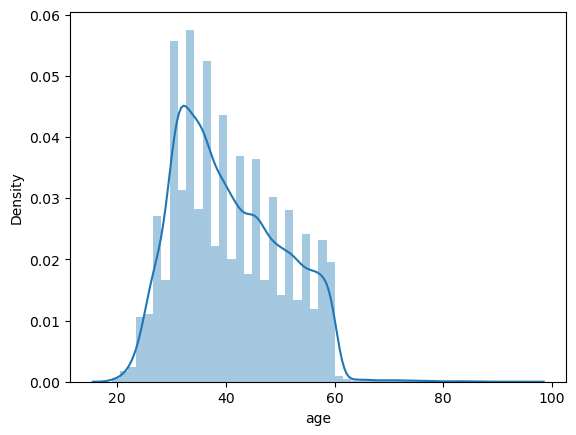

In [33]:
sns.distplot(train["age"])

<Axes: xlabel='job'>

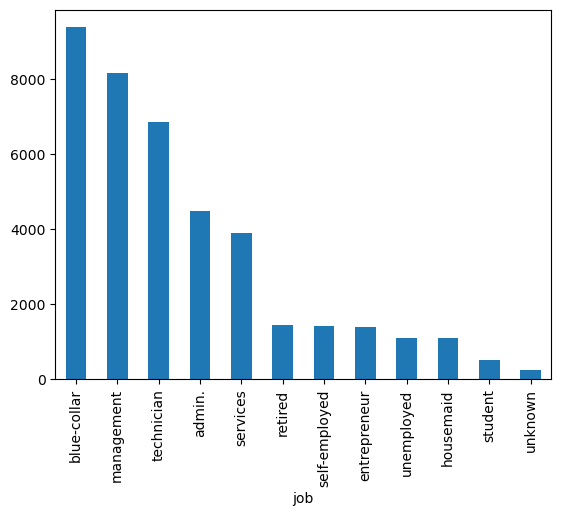

In [34]:
train['job'].value_counts().plot.bar()

<Axes: xlabel='default'>

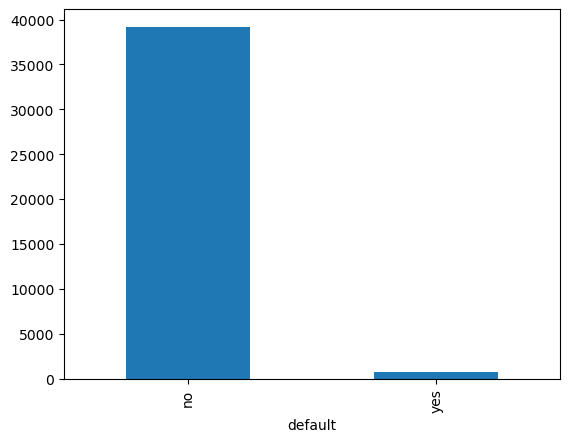

In [35]:
train['default'].value_counts().plot.bar()

y                no  yes
job                     
admin.         4132  351
blue-collar    8848  535
entrepreneur   1317   88
housemaid      1034   53
management     7490  676
retired        1286  151
self-employed  1302  112
services       3672  238
student         442   82
technician     6355  497
unemployed     1008   96
unknown         218   17


Text(0, 0.5, 'Percentage')

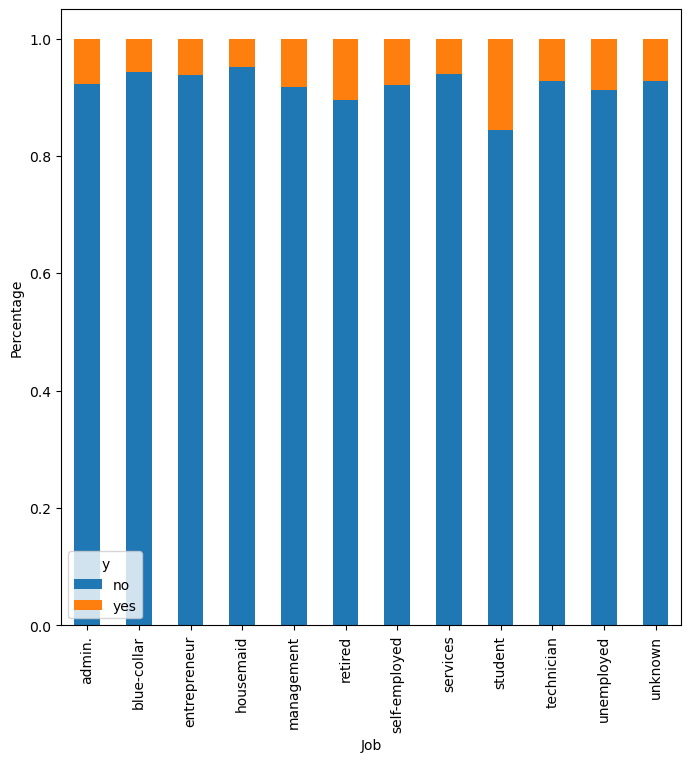

In [36]:
print(pd.crosstab(train['job'],train['y']))

job=pd.crosstab(train['job'],train['y'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('Job')
plt.ylabel('Percentage')

In [37]:
test.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

y           no   yes
default             
no       36344  2847
yes        760    49


Text(0, 0.5, 'Percentage')

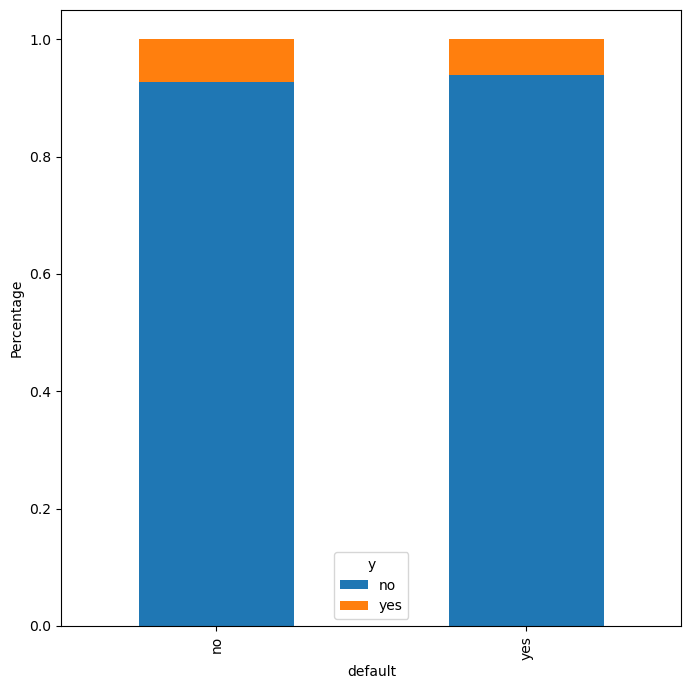

In [38]:
print(pd.crosstab(train['default'],train['y']))

default=pd.crosstab(train['default'],train['y'])
default.div(default.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('default')
plt.ylabel('Percentage')

In [11]:
# Data Preprocessing
def preprocess_data(data, is_train=True):
    # Encode categorical variables
    categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
    for col in categorical_columns:
        data[col] = LabelEncoder().fit_transform(data[col])

    # Handle the target variable for training data
    if is_train:
        data['y'] = LabelEncoder().fit_transform(data['y'])

    return data



In [12]:
train_data = preprocess_data(train_data)
test_data = preprocess_data(test_data, is_train=False)



In [13]:
# Separate features and target
X = train_data.drop(['y'], axis=1)
y = train_data['y']
X_test = test_data.copy()



In [14]:
# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [15]:
# Standardize numerical features
scaler = StandardScaler()
num_columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']



In [16]:
X_train[num_columns] = scaler.fit_transform(X_train[num_columns])
X_val[num_columns] = scaler.transform(X_val[num_columns])
X_test[num_columns] = scaler.transform(X_test[num_columns])



In [17]:
# Model Training - Random Forest
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)



RandomForestClassifier(class_weight='balanced', random_state=42)

In [18]:
# Model Evaluation
y_val_pred = rf_model.predict(X_val)
print("Classification Report:\n", classification_report(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("F1 Score:", f1_score(y_val, y_val_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      7421
           1       0.66      0.27      0.38       579

    accuracy                           0.94      8000
   macro avg       0.80      0.63      0.67      8000
weighted avg       0.92      0.94      0.92      8000

Confusion Matrix:
 [[7340   81]
 [ 425  154]]
F1 Score: 0.3783783783783784


In [19]:
# Predict on Test Data
y_test_pred = rf_model.predict(X_test)
X_test['y'] = LabelEncoder().fit(['no', 'yes']).inverse_transform(y_test_pred)



In [20]:
# Save Predictions
X_test.to_csv("predictions.csv", index=False)
print("Predictions saved to predictions.csv")

Predictions saved to predictions.csv
